In [1]:
%matplotlib inline
import sys
sys.path.append('../../')
from modules.tools import open_file, dataframe, ohlc_chart, norm, set_ATR, product_info

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
import time

In [3]:
symbol = 'GC'
pinfo = product_info()[symbol]
ohlc_raw = open_file('h5py', 'raw data/daily_futures.h5', mode='r')

#pdens = open_file('h5py', f'etc/{symbol}_TDOP_exp_3.h5', mode='r')
#pdens2 = open_file('h5py', f'etc/{symbol}_TDOP_exp_5.h5', mode='r')

#tdop_db = pdens[symbol]
#tdop_db2 = pdens2[symbol]
ohlc = dataframe(f'CME_{symbol}', ohlc_raw)

#set_ATR(ohlc, span=20)
#dates = tdop_db['dates'].value.astype('M8[s]')
#price = tdop_db['prices'].value

#tdops1 = tdop_db['tdop'].value
#tdops2 = tdop_db2['tdop'].value

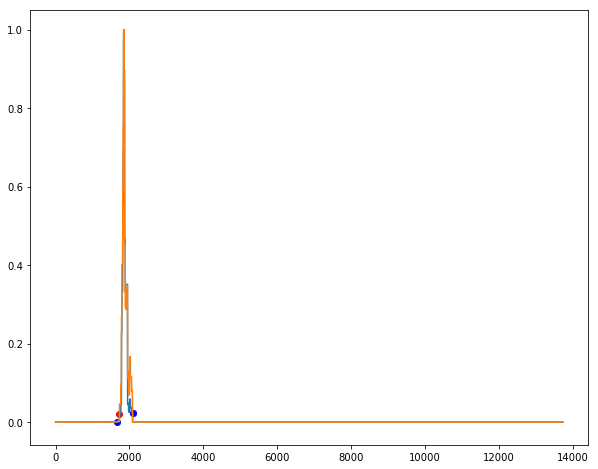

KeyboardInterrupt: 

In [13]:
start = np.where(dates==np.datetime64('2007-03-01'))[0][0]
for idx in range(start,3000):#enumerate(dates[1000:]):
    date = dates[idx]
    close = ohlc.loc[date].close
    pidx = np.abs(price - close).argmin()
    
    tdop1 = tdops1[idx]
    tdop2 = tdops2[idx]
    atr = int(ohlc.loc[date].ATR/pinfo['tick_unit'] )
    
    tdop2 = norm(tdop2, ntype='minmax')
    tdop1 = norm(tdop1, ntype='minmax')
    
    top1 = tdop1.argmax()
    top2 = tdop2.argmax()
    x=np.arange(len(tdop1))
    
    cond1 = np.where(tdop1>0.001)[0]
    cond2 = np.where(tdop2>0.001)[0]
    
    left1 = cond1.min()
    right1 = cond1.max()
    left2 = cond2.min()
    right2 = cond2.max()
    
    #sp1 = split(np.where(tdop1>10)[0], tdop1.argmax())[0]
    #sp2 = split(np.where(tdop2>10)[0], tdop2.argmax())[0]
    
    plt.figure().set_size_inches(10,8)
    
    plt.plot(x, tdop1)
    plt.plot(x, tdop2)
    
    plt.scatter(x[left1], tdop1[left1], color='red')
    plt.scatter(x[right1], tdop1[right1], color='red')
    plt.scatter(x[left2], tdop1[left2], color='blue')
    plt.scatter(x[right2], tdop1[right2], color='blue')
    #plt.plot(x[sp1],tdop1[sp1])
    #plt.plot(x[sp2], tdop2[sp2])
    
    #plt.axes().axvline(pidx, color='black')
    plt.show()
    time.sleep(0.5)
    clear_output(wait=True)
        
    

In [ ]:
pidx

In [27]:
left_1 = []
right_1 = []
left_2 = []
right_2 = []

for idx, date in enumerate(dates):
    print(f"\r {date}   ", flush=True, end='')
    atr = int(0.5*ohlc.loc[date].ATR/pinfo['tick_unit']) * 2
    close = ohlc.loc[date].close
    pidx = np.abs(price-close).argmin()
    
    tdop1 = tdops1[idx]
    tdop2 = tdops2[idx]
    
    tdop1 = norm(tdop1, ntype='minmax')
    tdop2 = norm(tdop2, ntype='minmax')
    
    x=np.arange(len(tdop1))
    
    cond1 = np.where(tdop1>0.0005)[0]
    cond2 = np.where(tdop2>0.0005)[0]
    
    left1 = cond1.min()
    right1 = cond1.max()
    left2 = cond2.min()
    right2 = cond2.max()
    
    #top1 = tdop1.argmax()
    #top2 = tdop2.argmax()
    #sp1 = split(np.where(tdop1>2)[0], tdop1.argmax())[0]
    #sp2 = split(np.where(tdop2>2)[0], tdop2.argmax())[0]
    
    left_1.append(left1)
    right_1.append(right1)
    left_2.append(left2)
    right_2.append(right2)
    

 2014-12-31T00:00:00   

(716.77499999999998, 854.55599999999993)

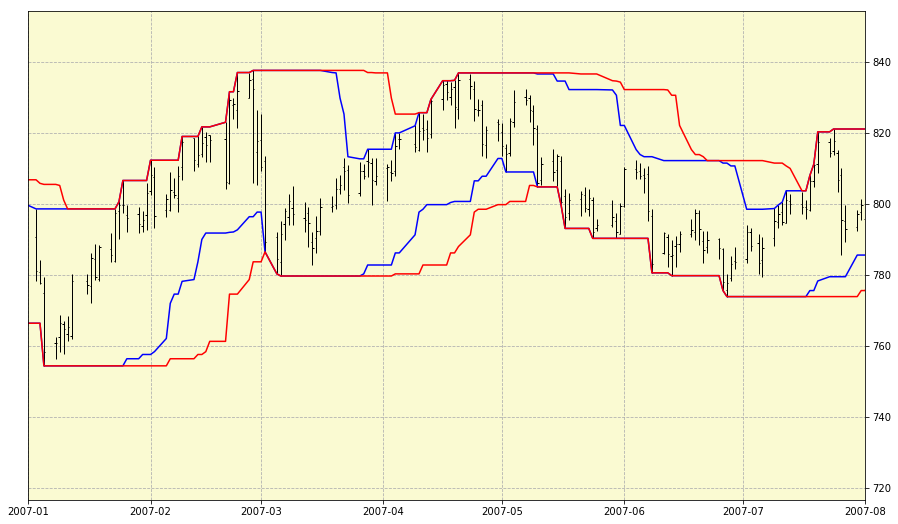

In [29]:
data = ohlc[:]
fig=plt.figure(figsize=(15,9))
ax=fig.add_subplot(111, label="ohlc")
ax = ohlc_chart(ax, data)
ax.plot(data.index, price[left_1], color='blue')
ax.plot(data.index, price[right_1], color='blue')
ax.plot(data.index, price[left_2], color='red')
ax.plot(data.index, price[right_2], color='red')

start = np.datetime64('2007-01-01')
end = np.datetime64('2007-08-01')
ax.set_xlim([start,end])

min = ohlc.loc[start:end].low.min()*0.95
max = ohlc.loc[start:end].high.max()*1.02
ax.set_ylim([min, max])

(716.77499999999998, 854.55599999999993)

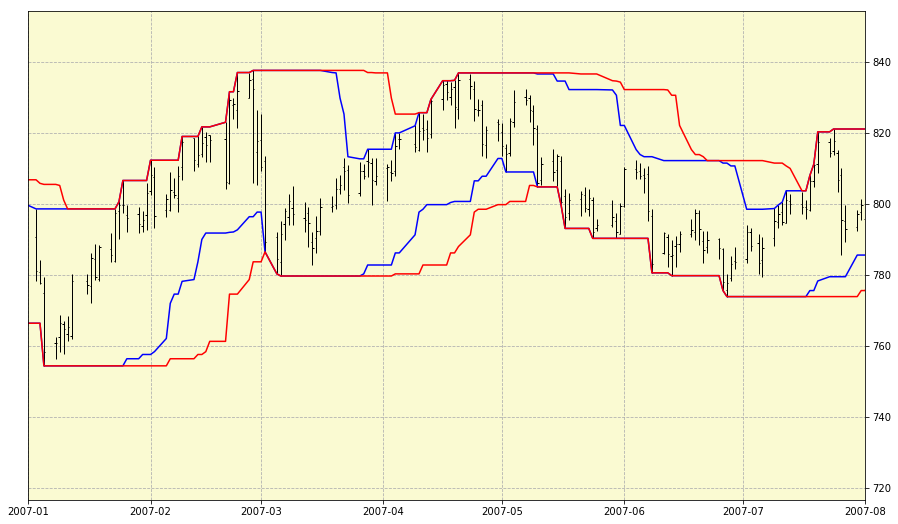

In [30]:
data = ohlc[:]
fig=plt.figure(figsize=(15,9))
ax=fig.add_subplot(111, label="ohlc")
ax = ohlc_chart(ax, data)
ax.plot(data.index, price[left_1], color='blue')
ax.plot(data.index, price[right_1], color='blue')
ax.plot(data.index, price[left_2], color='red')
ax.plot(data.index, price[right_2], color='red')

start = np.datetime64('2007-01-01')
end = np.datetime64('2007-08-01')
ax.set_xlim([start,end])

min = ohlc.loc[start:end].low.min()*0.95
max = ohlc.loc[start:end].high.max()*1.02
ax.set_ylim([min, max])